In [357]:

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [358]:
url = "D:\Data Science\Bangladesh Population Project\Bangladesh_Peopulation - Sheet1.csv"

df = pd.read_csv(url)

In [359]:
df["Population"]=df["Population"]/1000000


In [360]:
 df.rename(columns = {"Date(Year)":"Year"},inplace=True)


In [361]:

df.columns

Index(['Year', 'Population', 'Annual % Change', 'Name', 'Area A (km²)',
       ' Census_1991', 'Census_2001', ' Census_2011', ' Census _2022'],
      dtype='object')

In [362]:
df.head()

,Year,Population,Annual % Change,Name,Area A (km²),Census_1991,Census_2001,Census_2011,Census _2022
0,1950,39.728535,NaN,Barguna,"1,831","775,693","848,554","892,781","1,010,530"
1,1951,40.548590,2.06,Barisal,"2,785","2,207,426","2,355,967","2,324,310","2,570,450"
2,1952,41.426885,2.17,Bhola,"3,403","1,476,328","1,703,117","1,776,795","1,932,514"
3,1953,42.329279,2.18,Jhalakati,707,"666,139","694,231","682,669","661,161"
4,1954,43.282032,2.25,Patuakhali,"3,221","1,273,872","1,460,781","1,535,854","1,727,254"


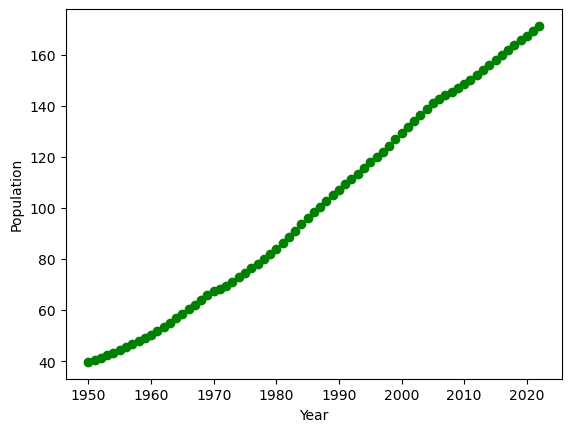

In [363]:

plt.scatter(df.Year, df.Population,  color='green')
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

In [364]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [365]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Year']])
train_y = np.asanyarray(train[['Population']])

regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.93737078]]
Intercept:  [-3747.0641671]


Text(0, 0.5, 'Population')

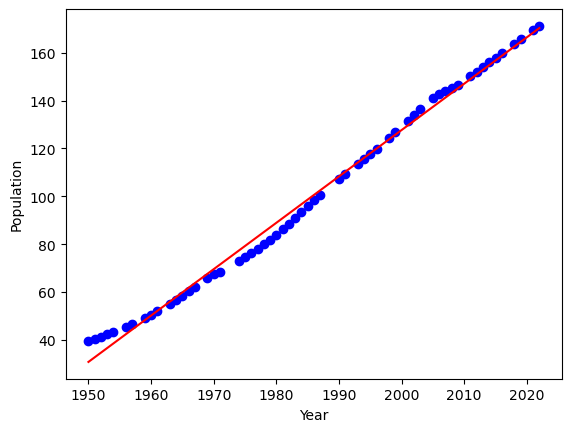

In [366]:
plt.scatter(train.Year, train.Population,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("Population")

In [367]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Year']])
test_y = np.asanyarray(test[['Population']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 1.90
Residual sum of squares (MSE): 5.21
R2-score: 1.00


Text(0, 0.5, 'Population')

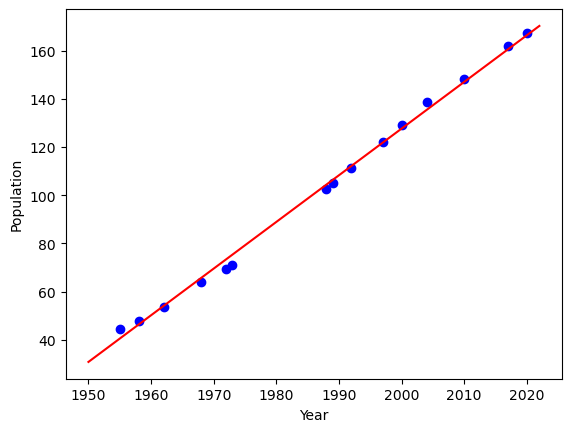

In [368]:
plt.scatter(test.Year, test.Population,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("Population")

In [372]:
years = range(2023, 2101)
data = {'Predicted_Year': [], 'Predicted_Population': []}

for year in years:
    data['Predicted_Year'].append(year)
    data['Predicted_Population'].append(regr.predict([[year]])[0])

dff = pd.DataFrame(data)

dff.head(100)


,Predicted_Year,Predicted_Population
0,2023,[172.23691288071177]
1,2024,[174.17428365677915]
2,2025,[176.11165443284654]
3,2026,[178.04902520891346]
4,2027,[179.98639598498085]
...,...,...
73,2096,[313.66497953361977]
74,2097,[315.60235030968715]
75,2098,[317.53972108575454]
76,2099,[319.47709186182146]


Mean absolute error: 1.90


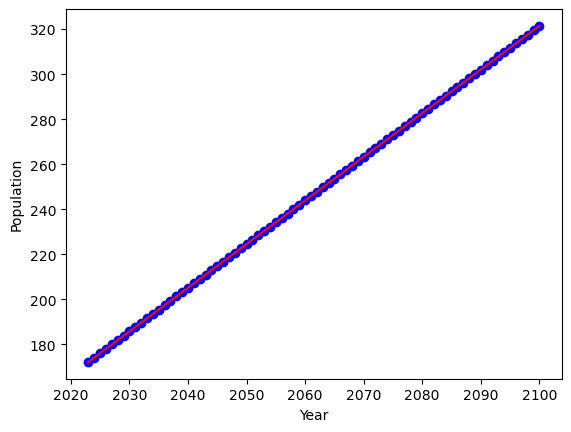

In [370]:
plt.scatter(dff.Predicted_Year, dff.Predicted_Population,  color='blue')
plt.plot(dff.Predicted_Year, dff.Predicted_Population,  color='red')
plt.xlabel("Year")
plt.ylabel("Population")
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))

In [373]:
mae = 1.90 
Population = 39.73 #Actual population value in 1950

accuracy = (1 - mae/Population) * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 95.22%
